In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from utils import read_excel_sheet
from task_9.generic_eda import GenericEDA
from task_24.task_24 import normalize_date_column, rename_columns_from_file, merge_dataframes_left_join, append_rehospitalized_status_to_patients

In [2]:
# Move to src directory
src_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

In [3]:
# Construct the full path to the file
file_absolute_path = os.path.join(src_dir, "data/rehospitalization.xlsx")
df = read_excel_sheet(file_absolute_path, "hospitalization1")

# Task 9 - Hospitalization 1 EDA

In [4]:
# Path to the translation_file
rehospitalization1_columns_file = os.path.join(src_dir, "team_1/translations/hospitalization1.json")
eda = GenericEDA(df, translation_file=rehospitalization1_columns_file)

In [5]:
eda.show_info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7033 entries, 0 to 7032
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Patient                   7033 non-null   int64         
 1   department_id             7033 non-null   int64         
 2   Admission_Medical_Record  7033 non-null   int64         
 3   Admission_Entry_Date      7033 non-null   datetime64[ns]
 4   Release_Date              7033 non-null   datetime64[ns]
 5   reception_type            6969 non-null   object        
 6   patient_origin            7033 non-null   object        
 7   Release_Type              7033 non-null   object        
 8   release_doctor_code       6919 non-null   float64       
 9   hospitalization_duration  7033 non-null   int64         
 10  admission_diagnoses       6572 non-null   object        
 11  release_diagnoses         7004 non-null   object        
dtyp

In [6]:
eda.show_summary_statistics()

Summary Statistics (Numerical):
            Patient  department_id  Admission_Medical_Record  \
count  7.033000e+03    7033.000000              7.033000e+03   
mean   3.321263e+05       2.940708              5.668914e+06   
std    3.178396e+05       1.411208              1.036855e+06   
min    3.100000e+01       1.000000              3.873037e+06   
25%    7.352200e+04       2.000000              4.780833e+06   
50%    2.059390e+05       3.000000              5.736045e+06   
75%    5.566750e+05       4.000000              6.594632e+06   
max    1.171452e+06       5.000000              7.333694e+06   

       release_doctor_code  hospitalization_duration  
count          6919.000000               7033.000000  
mean          10169.482295                  3.198777  
std            2925.033899                  3.710708  
min            1052.000000                 -1.000000  
25%           10112.000000                  1.000000  
50%           11119.000000                  2.000000  
75%   

In [7]:
eda.check_missing_values()

Missing Values in Each Column:
reception_type          64
release_doctor_code    114
admission_diagnoses    461
release_diagnoses       29
dtype: int64




**Cleaning nan values by logic**

In [8]:
# Clean NaN values for the missing columns, fill missing values with frequent value (mode)
for column in ['reception_type','release_doctor_code' ,'admission_diagnoses', 'release_diagnoses']:
    eda.clean_nan(column=column, fill_value=None)

Missing values in 'reception_type' have been filled with דחוף.
Missing values in 'release_doctor_code' have been filled with 6888.0.
Missing values in 'admission_diagnoses' have been filled with 78609.
Missing values in 'release_diagnoses' have been filled with 7865.


In [9]:
eda.check_missing_values()

Missing Values in Each Column:
Series([], dtype: int64)




In [10]:
eda.show_unique_values()

Unique values in 'Patient':
31075     53
354573    23
65151     14
3523      13
34605     13
          ..
590181     1
790490     1
6181       1
801748     1
431801     1
Name: Patient, Length: 4515, dtype: int64


Unique values in 'department_id':
1    1582
4    1582
3    1392
2    1263
5    1214
Name: department_id, dtype: int64


Unique values in 'Admission_Medical_Record':
5207766    1
4638165    1
4684750    1
6659199    1
6194540    1
          ..
7240838    1
6422712    1
7232954    1
6810555    1
7229378    1
Name: Admission_Medical_Record, Length: 7033, dtype: int64


Unique values in 'Admission_Entry_Date':
2021-09-04 22:21:04.440    1
2021-01-10 05:03:11.557    1
2021-01-29 21:15:59.523    1
2023-04-01 01:39:41.437    1
2022-09-24 02:36:33.567    1
                          ..
2023-11-26 15:30:32.170    1
2022-12-29 22:00:43.417    1
2023-11-22 18:41:23.047    1
2023-06-05 14:00:02.710    1
2023-11-21 16:22:11.033    1
Name: Admission_Entry_Date, Length: 7033, dtype: int64



/home/ran/Github-projects/data-science2-lab-final-project/src/team_1/task_9/generic_eda.py:100: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = self.df.corr()


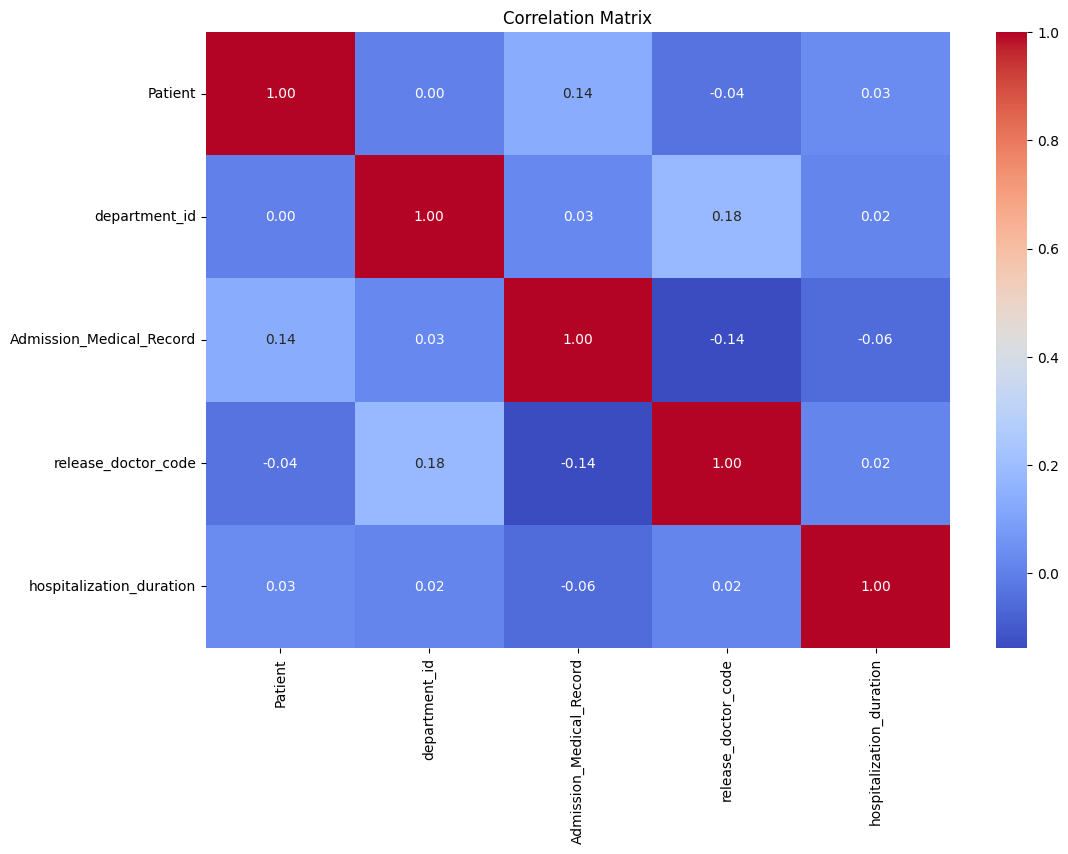

In [11]:
eda.plot_correlation_matrix()

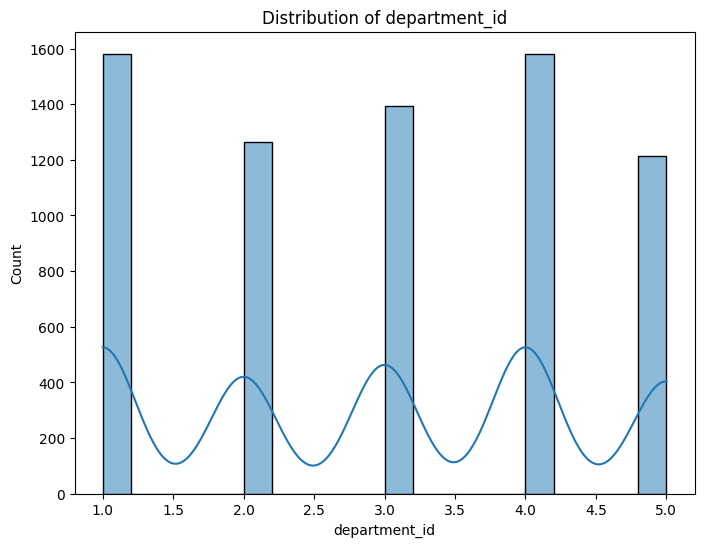

In [12]:
# Cell 5: Plot distribution of a numerical column
eda.plot_distribution('department_id')

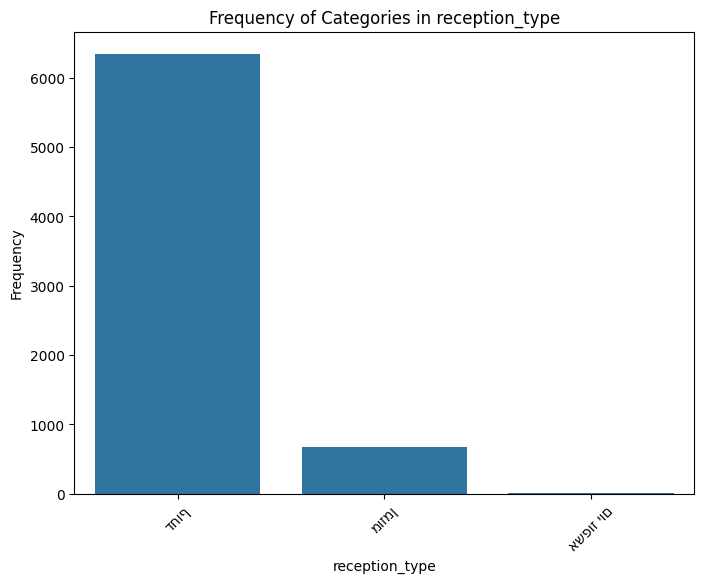

In [13]:
# Plot frequency of a categorical column
eda.plot_categorical_frequency('reception_type')

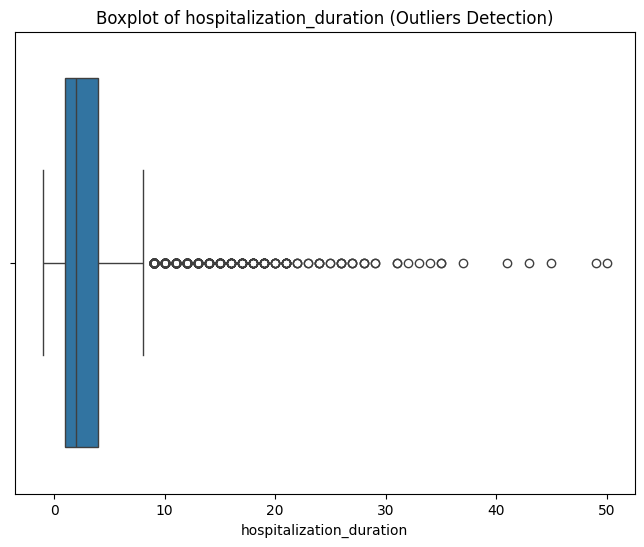

In [14]:
# Cell 6: Detect outliers in a numerical column using a boxplot
eda.detect_outliers('hospitalization_duration')

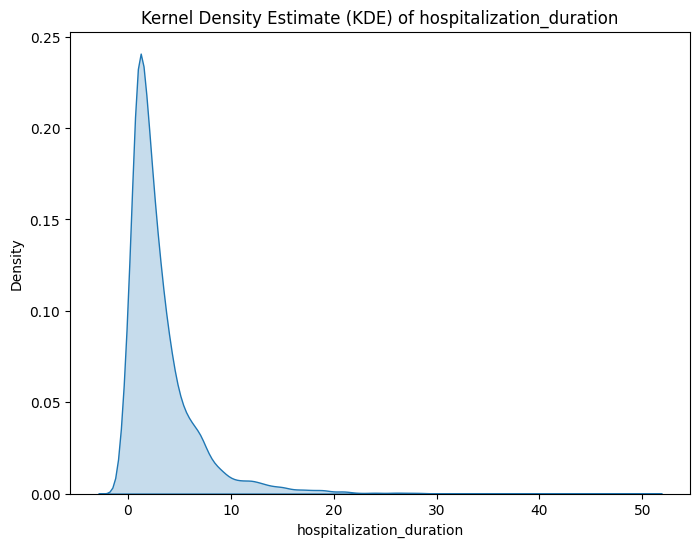

In [15]:
# Cell 7: Plot a Kernel Density Estimate (KDE) for a numerical column
eda.plot_kde_numerical('hospitalization_duration')

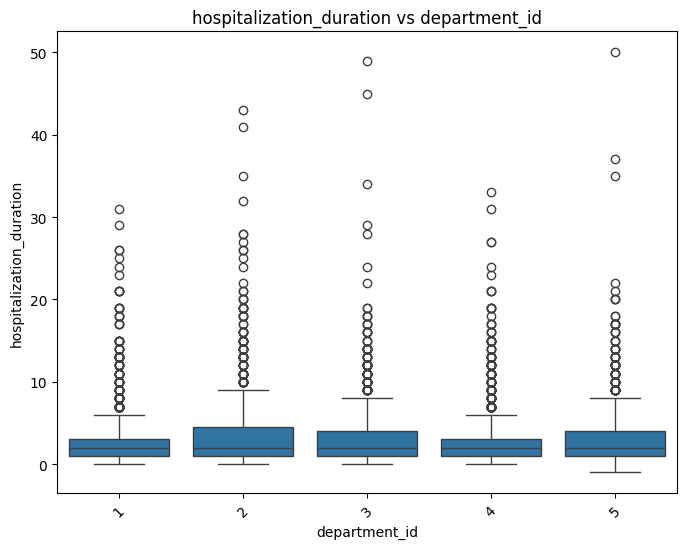

In [16]:
# Cell 8: Visualize the relationship between a numerical and categorical column
eda.plot_numeric_vs_categorical('hospitalization_duration', 'department_id')

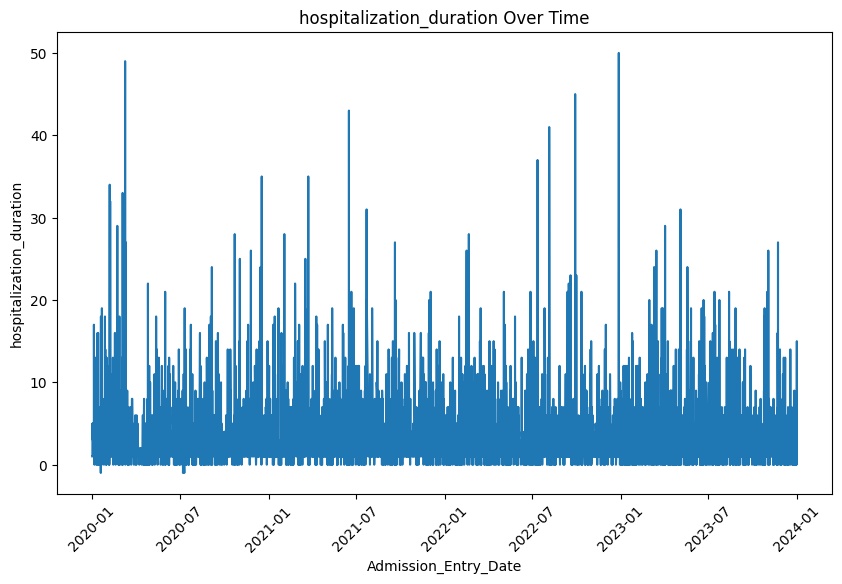

In [17]:
# Cell 10: Plot numerical column over time
eda.plot_numeric_over_time('hospitalization_duration', 'Admission_Entry_Date')

### Exporting clean data as csv to Data folder

In [18]:
rehospitalization1_csv_filename = os.path.join(src_dir, "data/rehospitalization1.csv")
eda.export_to_csv(file_path=rehospitalization1_csv_filename)

TypeError: GenericEDA.export_to_csv() missing 1 required positional argument: 'file_path'

# ---------------- END EDA -----------------------------

## TASK 24 

# Correlation Department occupancy and rehospitalization

In [4]:
# Construct the full path to the file
file_absolute_path = os.path.join(data_dir, "rehospitalization.xlsx")
department_df = read_excel_sheet(file_absolute_path, "unitsOccupancyRate")

renmae columns hebrew to english

In [5]:
department_df = rename_columns_from_file(department_df, os.path.join(os.getcwd(), "task_24", "department_columns.json"))

In [6]:
department_df.head()

,date,unitName1,occupancy_count,occupancy_rate
0,2020-01-01 07:00:00,4,31,0.775
1,2020-01-01 07:00:00,2,30,0.750
2,2020-01-01 07:00:00,5,40,1.000
3,2020-01-01 07:00:00,1,32,0.800
4,2020-01-01 07:00:00,3,37,0.925


In [7]:
department_df.isna().sum()

date               0
unitName1          0
occupancy_count    0
occupancy_rate     0
dtype: int64

**No null values in deparment df**

In [8]:
# remove null rows and normalize date in relevant dataframes
df = df.dropna()

for date_col in ['Admission_Entry_Date', 'Release_Date']:
    df[date_col] = normalize_date_column(df, column_name=date_col)

department_df['date'] = normalize_date_column(department_df, column_name='date')

## Append hospitalization status to each patient

This will help us find Patients with repeated hospitalization

In [9]:
df = append_rehospitalized_status_to_patients(df, column_name="Patient")
df.head()

,Patient,unitName1,Admission_Medical_Record,Admission_Entry_Date,Release_Date,סוג קבלה,מהיכן המטופל הגיע,Release_Type,רופא משחרר-קוד,ימי אשפוז,אבחנות בקבלה,אבחנות בשחרור,rehospitalization_count,is_rehospitalization
0,62051,1,5207766,2021-09-04,2021-09-08,דחוף,מביתו,שוחרר לביתו,6878.0,4,42731,42731,3,True
1,951769,2,5605505,2022-02-15,2022-02-16,דחוף,אחר,שוחרר לביתו,12615.0,1,Z3601,Z3601,1,False
2,863707,2,6755794,2023-05-15,2023-05-15,דחוף,מביתו,שוחרר לביתו,12599.0,0,7895,7895,12,True
3,884200,3,6964052,2023-07-27,2023-07-28,דחוף,ממוסד,שוחרר לביתו,11582.0,1,78609,"4919 , 78609",1,False
4,936226,4,7023187,2023-08-20,2023-08-21,דחוף,מביתו,שוחרר לביתו,12359.0,1,78609,"78609 , 81203 , 83100",1,False


filter patients with at least 2 rehospitalization_count

In [10]:
# Filter the DataFrame to include only patients with at least 2 records
df_filtered = df[df['is_rehospitalization']]
df_filtered.head()

,Patient,unitName1,Admission_Medical_Record,Admission_Entry_Date,Release_Date,סוג קבלה,מהיכן המטופל הגיע,Release_Type,רופא משחרר-קוד,ימי אשפוז,אבחנות בקבלה,אבחנות בשחרור,rehospitalization_count,is_rehospitalization
0,62051,1,5207766,2021-09-04,2021-09-08,דחוף,מביתו,שוחרר לביתו,6878.0,4,42731,42731,3,True
2,863707,2,6755794,2023-05-15,2023-05-15,דחוף,מביתו,שוחרר לביתו,12599.0,0,7895,7895,12,True
5,429566,3,6219263,2022-10-06,2022-10-08,דחוף,מביתו,שוחרר לביתו,11582.0,2,2769,2768,2,True
8,4767,5,6587317,2023-03-03,2023-03-05,דחוף,מביתו,שוחרר לביתו,11810.0,2,79.84,79.84,2,True
11,13171,5,6481821,2023-01-22,2023-01-24,דחוף,מביתו,שוחרר לביתו,9281.0,2,7802,E8842,8,True


# Left join Dataframes on department and date

In [11]:
# Assuming 'patient_id' is the common key
left_table_columns = ['unitName1', 'Admission_Entry_Date']
right_table_columns = ['unitName1', 'date']
df_combined = merge_dataframes_left_join(df_filtered, department_df, left_table_columns=left_table_columns, right_table_columns=right_table_columns)

In [12]:
df_combined.head()

,Patient,unitName1,Admission_Medical_Record,Admission_Entry_Date,Release_Date,סוג קבלה,מהיכן המטופל הגיע,Release_Type,רופא משחרר-קוד,ימי אשפוז,אבחנות בקבלה,אבחנות בשחרור,rehospitalization_count,is_rehospitalization,date,occupancy_count,occupancy_rate
0,62051,1,5207766,2021-09-04,2021-09-08,דחוף,מביתו,שוחרר לביתו,6878.0,4,42731,42731,3,True,2021-09-04,29.0,0.725
1,863707,2,6755794,2023-05-15,2023-05-15,דחוף,מביתו,שוחרר לביתו,12599.0,0,7895,7895,12,True,2023-05-15,41.0,1.025
2,429566,3,6219263,2022-10-06,2022-10-08,דחוף,מביתו,שוחרר לביתו,11582.0,2,2769,2768,2,True,2022-10-06,27.0,0.675
3,4767,5,6587317,2023-03-03,2023-03-05,דחוף,מביתו,שוחרר לביתו,11810.0,2,79.84,79.84,2,True,2023-03-03,33.0,0.825
4,13171,5,6481821,2023-01-22,2023-01-24,דחוף,מביתו,שוחרר לביתו,9281.0,2,7802,E8842,8,True,2023-01-22,47.0,1.175


## Correlation Rehospitalization - Department

Now we have all the data

In [13]:
# Calculate correlation for the entire dataset
global_correlation = df_combined['occupancy_rate'].corr(df_combined['rehospitalization_count'])
print(f"Global correlation between occupancy rate and rehospitalization: {global_correlation}")


Global correlation between occupancy rate and rehospitalization: 0.030880381887650823


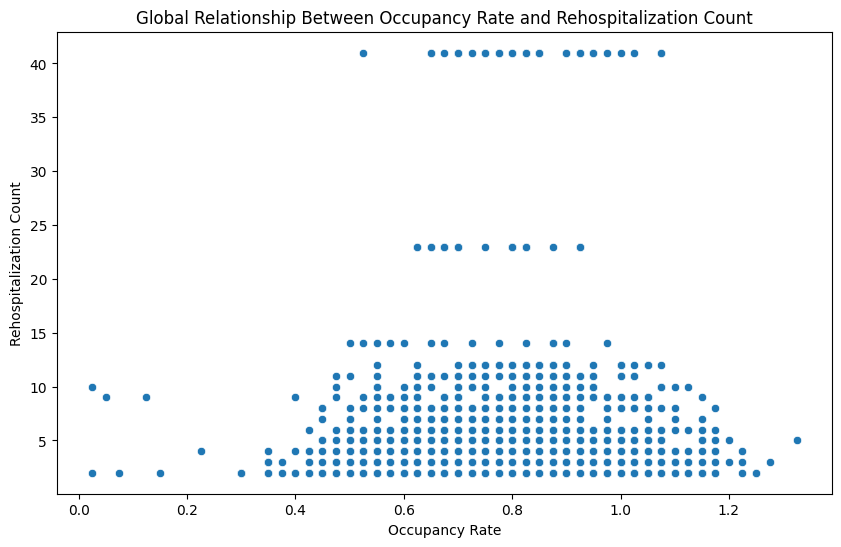

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='occupancy_rate', y='rehospitalization_count', data=df_combined)
plt.title('Global Relationship Between Occupancy Rate and Rehospitalization Count')
plt.xlabel('Occupancy Rate')
plt.ylabel('Rehospitalization Count')
plt.show()


### Per department Analysis

Department 1 correlation between occupancy rate and rehospitalization: 0.030275537428350655


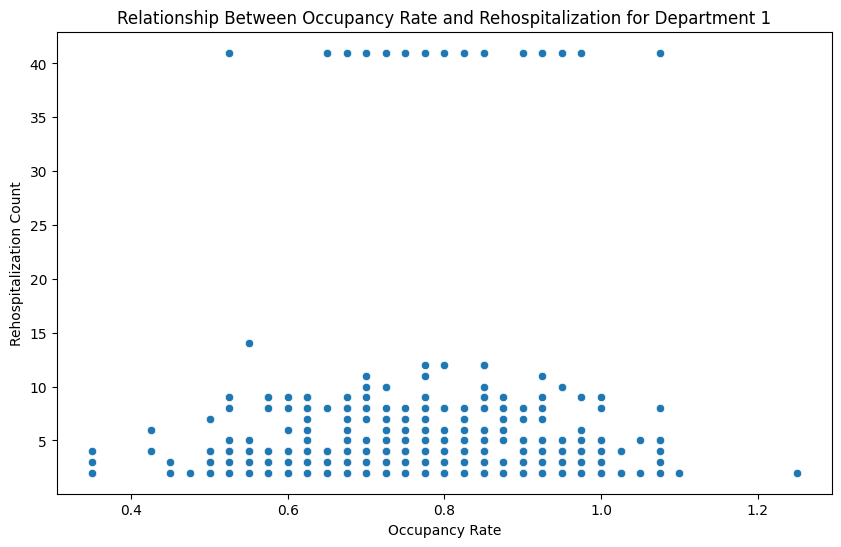

Department 2 correlation between occupancy rate and rehospitalization: 0.018983627503902183


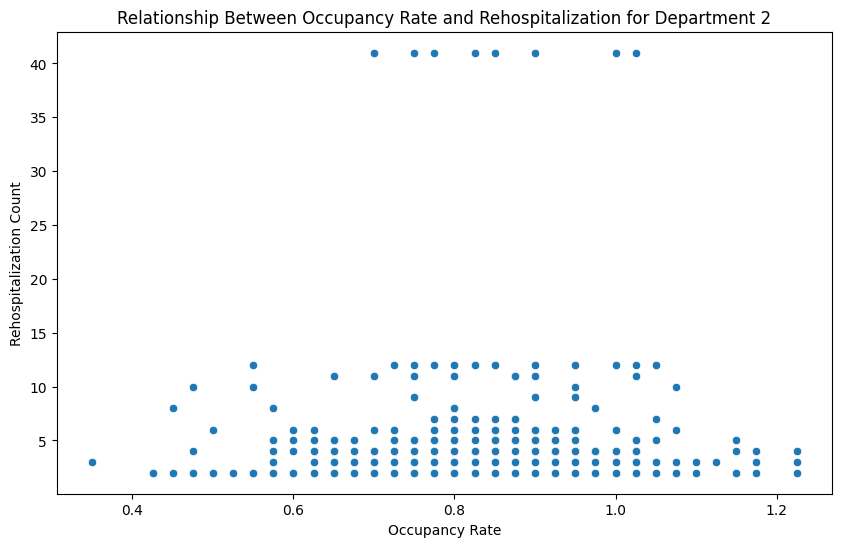

Department 3 correlation between occupancy rate and rehospitalization: 0.016703323640349592


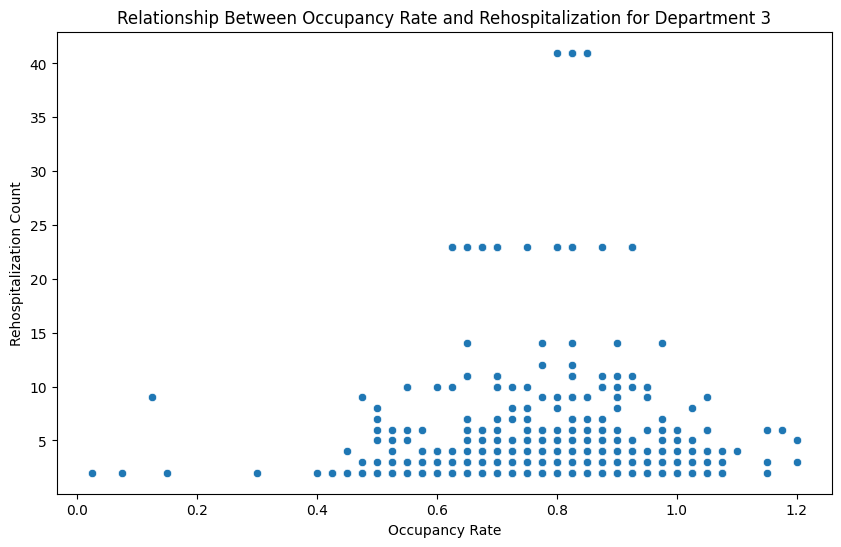

Department 5 correlation between occupancy rate and rehospitalization: 0.01388154027157148


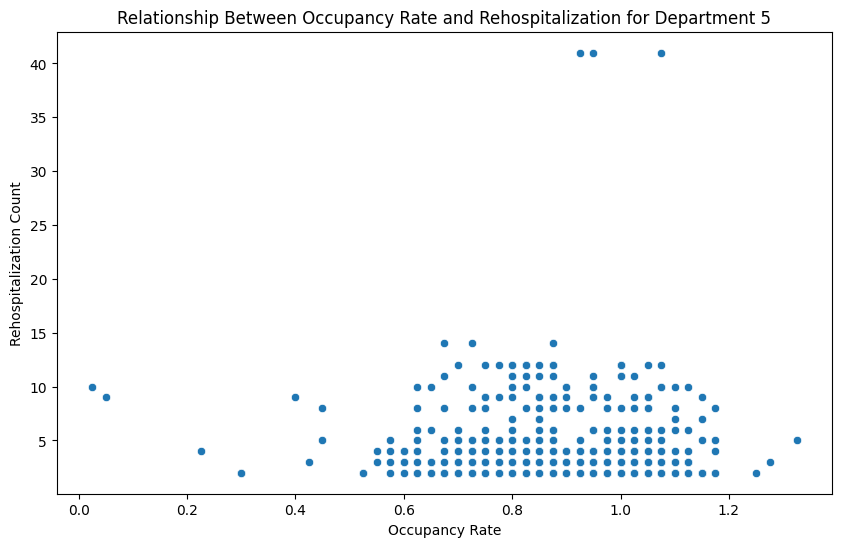

Department 4 correlation between occupancy rate and rehospitalization: -0.05598847890253648


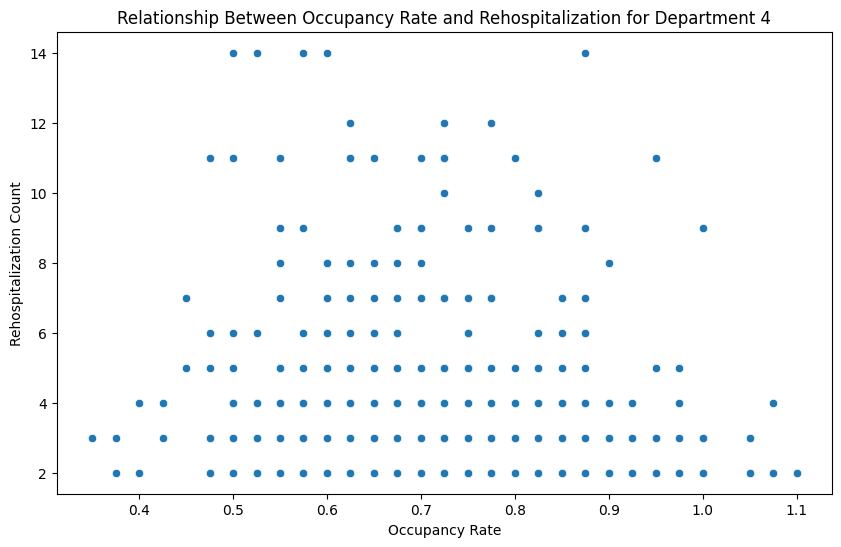

In [15]:
department_correlations = {}

for dept in df_combined['unitName1'].unique():
    dept_data = df_combined[df_combined['unitName1'] == dept]
    correlation = dept_data['occupancy_rate'].corr(dept_data['rehospitalization_count'])
    department_correlations[dept] = correlation
    print(f"Department {dept} correlation between occupancy rate and rehospitalization: {correlation}")

    # Visualize the relationship for this department
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='occupancy_rate', y='rehospitalization_count', data=dept_data)
    plt.title(f'Relationship Between Occupancy Rate and Rehospitalization for Department {dept}')
    plt.xlabel('Occupancy Rate')
    plt.ylabel('Rehospitalization Count')
    plt.show()

# Classifier for rehospitalization based on department occupancy

In [27]:
# Assuming 'unitName1' which is the department id is the common key
left_table_columns = ['unitName1', 'Admission_Entry_Date']
right_table_columns = ['unitName1', 'date']
df_combined_classifier = merge_dataframes_left_join(df, department_df, left_table_columns=left_table_columns, right_table_columns=right_table_columns)

# remove nan rows
df_combined_classifier = df_combined_classifier.dropna()

In [28]:
df_combined_classifier.head(2)

,Patient,unitName1,Admission_Medical_Record,Admission_Entry_Date,Release_Date,סוג קבלה,מהיכן המטופל הגיע,Release_Type,רופא משחרר-קוד,ימי אשפוז,אבחנות בקבלה,אבחנות בשחרור,rehospitalization_count,is_rehospitalization,date,occupancy_count,occupancy_rate
0,62051,1,5207766,2021-09-04,2021-09-08,דחוף,מביתו,שוחרר לביתו,6878.0,4,42731,42731,3,True,2021-09-04,29.0,0.725
1,951769,2,5605505,2022-02-15,2022-02-16,דחוף,אחר,שוחרר לביתו,12615.0,1,Z3601,Z3601,1,False,2022-02-15,20.0,0.500


In [38]:
features = ['occupancy_count', 'occupancy_rate', 'ימי אשפוז']
X = df_combined_classifier[features]
y = df_combined_classifier['is_rehospitalization']


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5491105955143079
Classification Report:
               precision    recall  f1-score   support

       False       0.60      0.02      0.03       586
        True       0.55      0.99      0.71       707

    accuracy                           0.55      1293
   macro avg       0.57      0.50      0.37      1293
weighted avg       0.57      0.55      0.40      1293



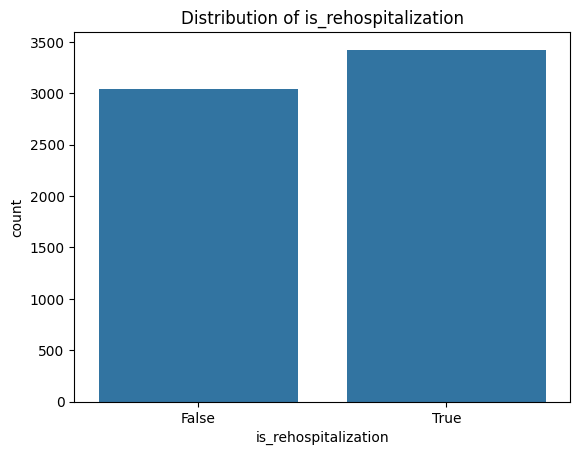

True     3424
False    3039
Name: is_rehospitalization, dtype: int64


In [41]:
sns.countplot(x=y)
plt.title('Distribution of is_rehospitalization')
plt.show()

# Alternatively
print(y.value_counts())


In [42]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)  # Adjust threshold as needed
selector.fit(X_train)
constant_features = [column for column in X_train.columns if column not in X_train.columns[selector.get_support()]]
print(f"Constant or near-constant features: {constant_features}")

Constant or near-constant features: []


In [43]:
import numpy as np

corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.9
highly_correlated_features = [column for column in upper.columns if any(upper[column] > 0.9)]
print(f"Highly correlated features: {highly_correlated_features}")


Highly correlated features: ['occupancy_rate']


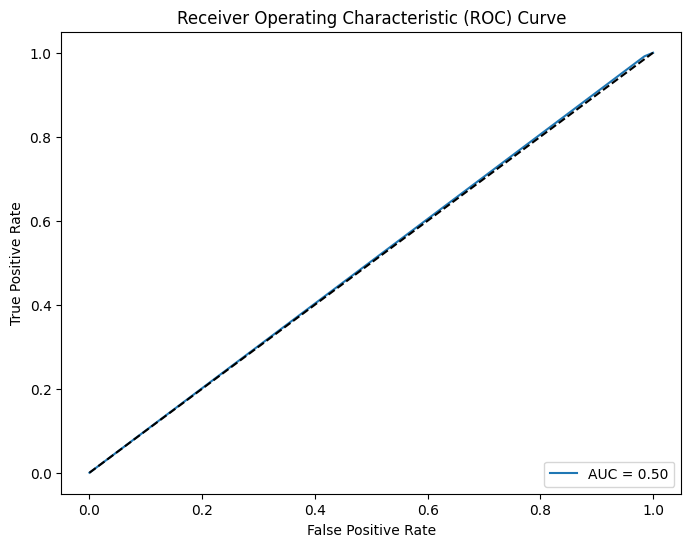

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
